### TO DO:
1. Data collection --> __Done__
2. Create environment --> __Done__<br>
2.1. Set up Action space (Discrete) --> __Done__ <br>
2.2. Set up State space (Continuous) --> __Done__ <br>
3. Develop RL Agent (DQN)


### Challenges with RL:
1. RL known to be divergent/ unstable when delaing with non linear approximators (such as NNs). 
<br>__Reason__: sequential updates.
<br>__Solution__: 
    1. Experience replay (DQN)
    2. Update action values periodically, rather than at every iteration, i.e. use 2 models. 1 Q network and other target network

### Advantages of this model:
1. __Model free__: No prior knowledge of environment needed. Samples are generated from emulator.
2. __Off Policy__: Learns about the *greedy policy* while following epsilon-greedy policy

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
from datetime import datetime

import warnings

warnings.filterwarnings('ignore')

In [2]:
# set the environment path
import os, sys
cwd = os.getcwd()
print(cwd)
path = f'{cwd}/../lib'

os.environ["PORT_MGMT_PATH"] = path

if os.environ["PORT_MGMT_PATH"] not in sys.path:
    sys.path.append(os.environ["PORT_MGMT_PATH"])
    
    


/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/UseCases/PortfolioManagement/notebooks


In [3]:

from logging.config import dictConfig
import logging
import loggingConfig


dictConfig(loggingConfig.DEFAULT_LOGGING)
Logger = logging.getLogger("Training")






In [4]:
import constants
import Environments
from importlib import reload

import Actions
from Actions.ActionSelection import EpsilonGreedy

In [5]:
reload(Environments)

<module 'Environments' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/UseCases/PortfolioManagement/notebooks/../lib/Environments.py'>

In [6]:
actions = [
    [-0.01,0.01],
    [-0.02,0.02],
    [-0.03,0.03],
    [0.01,-0.01],
    [0.02,-0.02],
    [0.03,-0.03],
    [-0.00,0.00],
]

env = Environments.Portfolio(assets = ["APA", "BMY"], initialWeight = [0.5, 0.5], \
                 nhistoricalDays = 30, \
                 actions = actions)

2021-02-01 08:41:35 INFO     Environments    Data Loaded!
2021-02-01 08:41:35 INFO     Actions         Action Space set with 7 possible actions 
2021-02-01 08:41:35 INFO     Environments    Environment reset


In [7]:
"""
for i in range(30):
    
    # take random action
    action = random.choice(actions)
    nextState, reward, dead = env.step(action = action)
"""


'\nfor i in range(30):\n    \n    # take random action\n    action = random.choice(actions)\n    nextState, reward, dead = env.step(action = action)\n'

In [8]:
env.portfolioHistory

,Date,Asset_APA,Asset_BMY,Cash,Cost,AUM
0,2003-12-31,14946.0,32503.0,19823.51,196.0,999804.0


In [9]:
env.currentPortfolioValue

999804.0

In [10]:
agentConfig  = os.path.join(path, "RLAGENTS_CONFIG.ini" )
#savePath    = os.path.join(os.environ["RL_PATH"], "models" )


In [11]:
import RLAgent

In [12]:
reload(RLAgent)

<module 'RLAgent' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/UseCases/PortfolioManagement/notebooks/../lib/RLAgent.py'>

In [13]:
DQNAgent  = RLAgent.DQN(env = env, configFile = agentConfig)

TypeError: __init__() missing 2 required positional arguments: 'finalExploration' and 'nbIterations'

In [ ]:

# Run the model
#savePath    = os.path.join(os.environ["RL_PATH"], "models" )
_time       = datetime.now().strftime("%Y%m%d%H%M")



In [ ]:
from tqdm import tqdm
import random

In [ ]:


Agent = DQNAgent



In [ ]:
mode= "TRAIN"

In [44]:
env.reset()
_currentState = env.currentState

_episodicReward = 0
_dead = False
_thisstepsTaken = 0



2021-01-21 17:20:51 INFO     Environments    Environment reset


In [50]:

loss = []
mode = "TRAIN"
count = 0
nbEpisodes = 20
for _thisepisode in tqdm(range(nbEpisodes)):

    # reset the environment
    env.reset()
    _currentState = env.currentState
    
    _episodicReward = 0
    _dead = False
    _thisstepsTaken = 0
    Logger.info(f"Episode: {_thisepisode}")

    #Agent.Tensorboard.step = _thisepisode
        

    while not _dead:

        # get the action from agent
        actionIndex = Agent.getAction(_currentState, mode = mode)
        action = Agent.env.action_space.actions[actionIndex]
        

        # perform the action
        _nextState, _reward, _dead = env.step(action)

        # record into memory
        Agent.updateMemory(_currentState, actionIndex, _reward, _nextState, _dead)

        # train the agent and update the state
        Agent.trainAgent(_dead, batch_size = Agent.Qmodel.batchSize)
        if count == 100:
            mymemory = Agent.memory.copy()
            myloss = Agent.callbacks[1]
            mymodel = Agent.Qmodel.model
        
        
        # update States
        _currentState = _nextState
        _thisstepsTaken += 1
        count += 1

        _episodicReward += _reward

        # if game over, then exit the loop
        if _dead == True:
            break   


    # ---- For logging ------
    # In case of Neural networks, create tensorboard flow
    #Agent.updateLoggerInfo(episodeCount = _thisepisode, episodicReward = _episodicReward, \
    #                        episodicStepsTaken = _thisstepsTaken, mode = "TRAIN")



  0%|          | 0/20 [00:00<?, ?it/s]

2021-01-21 17:23:15 INFO     Environments    Environment reset
2021-01-21 17:23:15 INFO     Training        Episode: 0


  5%|▌         | 1/20 [00:42<13:31, 42.73s/it]

2021-01-21 17:23:58 INFO     Environments    Environment reset
2021-01-21 17:23:58 INFO     Training        Episode: 1


 10%|█         | 2/20 [01:22<12:33, 41.85s/it]

2021-01-21 17:24:38 INFO     Environments    Environment reset
2021-01-21 17:24:38 INFO     Training        Episode: 2


 15%|█▌        | 3/20 [02:02<11:43, 41.37s/it]

2021-01-21 17:25:18 INFO     Environments    Environment reset
2021-01-21 17:25:18 INFO     Training        Episode: 3


 20%|██        | 4/20 [02:42<10:52, 40.80s/it]

2021-01-21 17:25:57 INFO     Environments    Environment reset
2021-01-21 17:25:57 INFO     Training        Episode: 4


 25%|██▌       | 5/20 [03:21<10:06, 40.40s/it]

2021-01-21 17:26:37 INFO     Environments    Environment reset
2021-01-21 17:26:37 INFO     Training        Episode: 5


 30%|███       | 6/20 [04:06<09:42, 41.63s/it]

2021-01-21 17:27:21 INFO     Environments    Environment reset
2021-01-21 17:27:21 INFO     Training        Episode: 6


 35%|███▌      | 7/20 [04:45<08:53, 41.07s/it]

2021-01-21 17:28:01 INFO     Environments    Environment reset
2021-01-21 17:28:01 INFO     Training        Episode: 7


 40%|████      | 8/20 [05:25<08:08, 40.67s/it]

2021-01-21 17:28:41 INFO     Environments    Environment reset
2021-01-21 17:28:41 INFO     Training        Episode: 8


 45%|████▌     | 9/20 [06:26<08:32, 46.59s/it]

2021-01-21 17:29:41 INFO     Environments    Environment reset
2021-01-21 17:29:41 INFO     Training        Episode: 9


 50%|█████     | 10/20 [07:18<08:04, 48.43s/it]

2021-01-21 17:30:34 INFO     Environments    Environment reset
2021-01-21 17:30:34 INFO     Training        Episode: 10


 55%|█████▌    | 11/20 [08:02<07:02, 46.94s/it]

2021-01-21 17:31:17 INFO     Environments    Environment reset
2021-01-21 17:31:17 INFO     Training        Episode: 11


 60%|██████    | 12/20 [08:44<06:03, 45.39s/it]

2021-01-21 17:31:59 INFO     Environments    Environment reset
2021-01-21 17:31:59 INFO     Training        Episode: 12


 65%|██████▌   | 13/20 [09:24<05:06, 43.84s/it]

2021-01-21 17:32:39 INFO     Environments    Environment reset
2021-01-21 17:32:39 INFO     Training        Episode: 13


 70%|███████   | 14/20 [10:03<04:15, 42.58s/it]

2021-01-21 17:33:19 INFO     Environments    Environment reset
2021-01-21 17:33:19 INFO     Training        Episode: 14


 75%|███████▌  | 15/20 [10:43<03:28, 41.76s/it]

2021-01-21 17:33:59 INFO     Environments    Environment reset
2021-01-21 17:33:59 INFO     Training        Episode: 15


 80%|████████  | 16/20 [11:23<02:44, 41.25s/it]

2021-01-21 17:34:39 INFO     Environments    Environment reset
2021-01-21 17:34:39 INFO     Training        Episode: 16


 85%|████████▌ | 17/20 [12:02<02:01, 40.60s/it]

2021-01-21 17:35:18 INFO     Environments    Environment reset
2021-01-21 17:35:18 INFO     Training        Episode: 17


 90%|█████████ | 18/20 [12:42<01:20, 40.25s/it]

2021-01-21 17:35:57 INFO     Environments    Environment reset
2021-01-21 17:35:57 INFO     Training        Episode: 18


 95%|█████████▌| 19/20 [13:21<00:39, 39.99s/it]

2021-01-21 17:36:37 INFO     Environments    Environment reset
2021-01-21 17:36:37 INFO     Training        Episode: 19


100%|██████████| 20/20 [15:59<00:00, 47.97s/it]


In [48]:
myloss.history

{'loss': [12.21529769897461], 'mean_squared_error': [12.215298]}

In [49]:
len(mymemory)

100

In [51]:
Agent.env.portfolioHistory

,Date,Asset_APA,Asset_BMY,Cash,Cost,AUM
0,2003-12-31,14946.0,32503.0,19823.51,196.00,9.998040e+05
1,2004-01-02,14641.0,33166.0,19819.51,4.00,1.008764e+06
2,2004-01-05,15572.0,31210.0,19807.40,12.11,1.014572e+06
3,2004-01-06,15572.0,31210.0,19807.40,0.00,1.019141e+06
4,2004-01-07,15264.0,31868.0,19803.32,4.08,1.019902e+06
...,...,...,...,...,...,...
4272,2020-12-18,119858.0,-487.0,-76233.91,7.12,1.730450e+06
4273,2020-12-21,117600.0,61.0,-76247.75,13.84,1.673895e+06
4274,2020-12-22,116473.0,331.0,-76254.45,6.70,1.588678e+06
4275,2020-12-23,115348.0,590.0,-76260.80,6.35,1.664573e+06


In [ ]:
# lets run the model now on a new episode. 

In [56]:
env.reset()
_currentState = env.currentState

_episodicReward = 0
_dead = False
_thisstepsTaken = 0

#Agent.Tensorboard.step = _thisepisode
mode = "TEST"

while not _dead:

    # get the action from agent
    
    state = np.array(_currentState).reshape(1, Agent.env.observation_space.n)
    _actionsValues      = Agent.Qmodel.predict(state)[0] 
    actionIndex  = np.argmax(_actionsValues)
    

    
    #actionIndex = Agent.getAction(_currentState, mode = mode)
    action = Agent.env.action_space.actions[actionIndex]


    # perform the action
    _nextState, _reward, _dead = env.step(action)

    #update state and 


    # update States
    _currentState = _nextState
    _thisstepsTaken += 1
    count += 1

    _episodicReward += _reward

    # if game over, then exit the loop
    if _dead == True:
        break   


2021-01-21 17:45:40 INFO     Environments    Environment reset


In [57]:
Agent.env.portfolioHistory

,Date,Asset_APA,Asset_BMY,Cash,Cost,AUM
0,2003-12-31,14946.0,32503.0,19823.51,196.00,9.998040e+05
1,2004-01-02,14641.0,33166.0,19819.51,4.00,1.008764e+06
2,2004-01-05,14331.0,33818.0,19815.47,4.04,1.013888e+06
3,2004-01-06,14023.0,34475.0,19811.41,4.06,1.018447e+06
4,2004-01-07,13715.0,35132.0,19807.34,4.07,1.019800e+06
...,...,...,...,...,...,...
4272,2020-12-18,493279222.0,-122900708.0,-3610854.48,317.31,-1.991330e+08
4273,2020-12-21,493409120.0,-122932256.0,-3611651.01,796.53,-2.995150e+08
4274,2020-12-22,493610814.0,-122980557.0,-3612849.07,1198.06,-5.885239e+08
4275,2020-12-23,494027616.0,-123076361.0,-3615203.17,2354.10,-2.095452e+08


In [143]:
np.random.binomial(1, 1)

1

In [166]:
_dict = {}
_currentState = Agent.env.currentState
for i in range(10000):
    action = Agent.getAction(_currentState, mode = mode)
    try:
        _dict[action]
    except KeyError:
        _dict[action] = 0
    
    _dict[action] += 1
    
_dict

{1: 1343, 2: 1353, 5: 1405, 6: 1338, 3: 1319, 4: 1398, 0: 1844}

In [31]:
len(Agent.memory[0][0])

64

In [26]:
# lets test it out


2349.029930391902

In [14]:
loss = []
mode = "TEST"
for _thisepisode in tqdm(range(Agent.NbEpisodesTest)):

    # reset the environment
    env.reset()
    _currentState = env.currentState
    
    _episodicReward = 0
    _dead = False
    _thisstepsTaken = 0
    Logger.info(f"Episode: {_thisepisode+1}")

    #Agent.Tensorboard.step = _thisepisode
        

    while not _dead:

        # get the action from agent
        action = Agent.getAction(_currentState, mode = mode)
        

        # perform the action
        _nextState, _reward, _dead = env.step(action)

        # record into memory
        #Agent.updateMemory(_currentState, action, _reward, _nextState, _dead)

        # train the agent and update the state
        """
        history = Agent.trainAgent(batch_size = Agent.Qmodel.batchSize)
        if history  is not None:
            loss.append(history.history["loss"])
        """
        #Agent.trainAgent(_dead, batch_size = Agent.Qmodel.batchSize)
        
        # update States
        _currentState = _nextState
        _thisstepsTaken += 1

        _episodicReward += _reward

        # if game over, then exit the loop
        if _dead == True:
            break   


    # ---- For logging ------
    # In case of Neural networks, create tensorboard flow
    #Agent.updateLoggerInfo(episodeCount = _thisepisode, episodicReward = _episodicReward, \
    #                        episodicStepsTaken = _thisstepsTaken, mode = "TRAIN")



NameError: name 'tqdm' is not defined

In [42]:
env.portfolioHistory

,Date,Asset_APA,Asset_BMY,Cash,Cost,AUM
0,2003-12-31,14946.0,32503.0,19823.51,196.0,9.998040e+05
1,2004-01-02,14946.0,32503.0,19823.51,0.0,1.008424e+06
2,2004-01-05,14946.0,32503.0,19823.51,0.0,1.013891e+06
3,2004-01-06,14946.0,32503.0,19823.51,0.0,1.018464e+06
4,2004-01-07,14946.0,32503.0,19823.51,0.0,1.019353e+06
...,...,...,...,...,...,...
4272,2020-12-18,14946.0,32503.0,19823.51,0.0,2.300535e+06
4273,2020-12-21,14946.0,32503.0,19823.51,0.0,2.257283e+06
4274,2020-12-22,14946.0,32503.0,19823.51,0.0,2.227520e+06
4275,2020-12-23,14946.0,32503.0,19823.51,0.0,2.223408e+06


In [44]:
import matplotlib.pyplot as plt

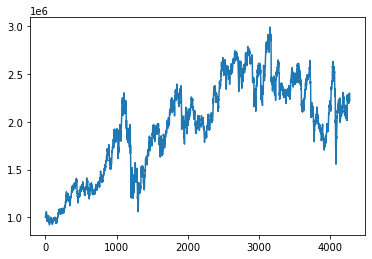

In [45]:
plt.plot(env.portfolioHistory["AUM"])

In [48]:
Agent.Targetmodel.model.summary()

Model: "TargetModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 7)                 231       
Total params: 6,471
Trainable params: 6,471
Non-trainable params: 0
_________________________________________________________________


In [20]:
import utils

In [21]:
utils.get_val(Agent.config, tag = "NB_EPISODES_TRAIN", default_value= 2000)

2000

In [23]:
Agent.config

In [102]:
from tensorflow.keras.models import Sequential, Model

In [103]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import RMSprop

In [115]:
model = Sequential(name = "temp")

In [116]:
model.add(Dense(units = 64, activation = "relu", input_dim = 64))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 7, activation = "linear"))



In [117]:
model.summary()

Model: "temp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 7)                 231       
Total params: 6,471
Trainable params: 6,471
Non-trainable params: 0
_________________________________________________________________


In [125]:
state.reshape(1,64).shape

(1, 64)

In [143]:
reload(Environments)

<module 'Environments' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/UseCases/PortfolioManagement/notebooks/../lib/Environments.py'>

In [144]:
actions = [
    [-0.01,0.01],
    [-0.02,0.02],
    [-0.03,0.03],
    [0.01,-0.01],
    [0.02,-0.02],
    [0.03,-0.03],
    [-0.00,0.00],
    [-1, -1]
]

env = Environments.Portfolio(assets = ["APA", "BMY"], initialWeight = [0.5, 0.5], \
                 nhistoricalDays = 2, \
                 actions = actions)

2021-02-01 17:01:39 INFO     Environments    Data Loaded!
2021-02-01 17:01:39 INFO     Actions         Action Space set with 8 possible actions 
2021-02-01 17:01:39 INFO     Environments    Environment reset


In [145]:
len(env.currentState)

16

In [146]:
_, rew, _ = env.step([-1,-1])

In [147]:
env.observation_space.n

16

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adagrad, RMSprop, Adam
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.callbacks import History
from tensorflow.keras.initializers import glorot_normal 


In [149]:
from sklearn import preprocessing

In [150]:
# create the network model
# 2 networks required
from collections import deque

memory = deque(maxlen=100)




In [151]:
# just 2 layers
QNetwork = Sequential()


layer1 = Dense(32, input_shape = (16,), activation = "relu", kernel_initializer=glorot_normal())
#layer1 = Dense(32, input_shape = (64,), activation = "relu")
layer2 = Dense(8, activation = "linear", kernel_initializer=glorot_normal())   # 7 actions
QNetwork.add(layer1)
QNetwork.add(layer2)



In [152]:
optimizer = Adam(learning_rate = 0.00025)
loss = "mse"
metrics = [loss] if loss in ["mae", "mse"] else ["mse"]

        # compile the model
QNetwork.compile(optimizer = optimizer, loss = loss, metrics = metrics)

        

In [153]:
ModelHistory   = History()     # to store learning history
callbacks = []
callbacks.append(ModelHistory)

In [154]:
TargetNetwork = Sequential()
# just 2 layers
#layer1 = Dense(32, input_shape = (64,), activation = "relu", kernel_initializer=glorot_normal())
layer1 = Dense(32, input_shape = (16,), activation = "relu")

layer2 = Dense(8, activation = "linear", kernel_initializer=glorot_normal())   # 7 actions
TargetNetwork.add(layer1)
TargetNetwork.add(layer2)

optimizer = Adam(learning_rate = 0.00025)
loss = "mse"
metrics = [loss] if loss in ["mae", "mse"] else ["mse"]

        # compile the model
TargetNetwork.compile(optimizer = optimizer, loss = loss, metrics = metrics)

       

TargetNetwork.set_weights(QNetwork.get_weights())


In [155]:
print(QNetwork.summary())
print(TargetNetwork.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 264       
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________
None


In [156]:
from Actions.ActionSelection import EpsilonGreedy

In [157]:
import Actions.ActionSelection as act
reload(act)

<module 'Actions.ActionSelection' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/UseCases/PortfolioManagement/notebooks/../lib/Actions/ActionSelection.py'>

In [158]:
from Actions.ActionSelection import EpsilonGreedy

In [159]:
eps = EpsilonGreedy(1, 0.1, 1000)

In [160]:
def getaction(state, env, trainingiterationCount = 1):
    
    # get one hot representation of state
    #_state = getOneHotrepresentation(state, num_classes=self.env.observation_space.n)

    state = np.array(state).reshape(1, env.observation_space.n)
    
    __state = normalizeX(state)
    
    _actionsValues      = QNetwork.predict(__state)[0] 
    _greedyActionIndex  = np.argmax(_actionsValues)

    # epsilonGreedyaction        
    action          = eps.chooseAction(trainingiterationCount, range(env.action_space.n), \
                                        optimalActionIndex=_greedyActionIndex)



    return action

In [161]:

def updatememory(memory, currentState, currentAction, reward, nextState, dead):
    if any(x is None for x in currentState) is False:
        memory.append((currentState, currentAction, reward, nextState, dead))
    return memory



In [162]:
def normalizeX(X):
    
    a = np.array(list(zip(*X))[:-8]).T
    
    normalized_a = preprocessing.normalize(a)
    
    old = pd.DataFrame(X)
    
    columns = []
    
    for col in old.columns:
        if int(col) >= len(old.columns) - 8:
            columns.append(col)
            
    action = old[columns] 
    #action = pd.DataFrame(np.array(list(zip(*X))[-7:-8]).T)
    new = pd.DataFrame(normalized_a)
    
    
    output = new.merge(action, left_index = True, right_index = True)
    
    #temp = pd.DataFrame(X)
    return np.array(output)
    
    # remove last columns from normalization, as they are just binary inputs
    

In [163]:
def getTrainingData(samples, env, targetNetwork):
    
    discountfactor = 0.01
    
    # -----X Train------
    
    # for all experience in batchsize
    curStates       = list(list(zip(*samples)))[0]
    actions         = list(list(zip(*samples)))[1]
    nextStates      = list(list(zip(*samples)))[3]
    rewards         = list(list(zip(*samples)))[2]
    done            = list(list(zip(*samples)))[4]

    
    # Add pre-processing step if needed
    inputStates     = np.array(curStates).reshape(len(curStates), env.observation_space.n)
    
    x_train = inputStates
    
    # -----Y Train------
    nextStates      = np.array(nextStates).reshape(len(nextStates), env.observation_space.n)
    
    
    # apply Q update
    # y <-- r + gamma*max(Q_target(s_next))
    
    nextQvalues = targetNetwork.predict(nextStates)

    y_train = np.zeros(shape = nextQvalues.shape)
    
    max_nextQvalues = list(map(max, nextQvalues))
    
    for index, action in enumerate(actions):
        if done[index]:
            y_train[index][int(action)] = rewards[index] 
        else:
            y_train[index][int(action)] = rewards[index] + discountfactor * max_nextQvalues[index]
            
            
    
    # training data is set
    return x_train, y_train

        
    
    

    
    
    
    

In [164]:
env.reset()

2021-02-01 17:01:45 INFO     Environments    Environment reset


In [165]:
nbEpisodes = 5
memory = []
count = 0
immediate_reward = []
batch_size=32
epoch = 1

samplingStart = 150


In [166]:
env.currentPortfolioValue

999902.0

In [167]:
config = {"initialCash1": constants.MILLION, "minCash": 0.02, "transactionCost": 0.0001}

In [168]:
weights = []
loss = []

# reset environment
env.reset()
dead = False
samplingStartCounter = 0

_currentState = env.currentState

nbEpisodes = 5


2021-02-01 17:01:49 INFO     Environments    Environment reset


In [169]:

for i in range(nbEpisodes):
    
    # reset environment
    env.reset()
    dead = False
    
    _currentState = env.currentState
    
    while not dead:
        
        # get epsilon greeedy action
        count += 1
        if any(x is None for x in _currentState) is False:
            actionIndex = getaction(_currentState, env, count)

            action = env.action_space.actions[actionIndex]

            # take a step in this direction
            _nextState, _reward, dead = env.step(action)
            #print(_reward, dead, action)
            #immediate_reward.append(_reward)

            # update memory
            memory = updatememory(memory, _currentState, actionIndex, _reward, _nextState, dead)

            # sample (uniform) from memory  (32 samples)
            if len(memory) >= 100:

                samples = random.sample(memory, 100)   

                # update Q value

                # get training data

                x_train, y_train = getTrainingData(samples, env, TargetNetwork)

                # normalize X data
                x_train = normalizeX(x_train)

                # train the model
                QNetwork.fit(x=x_train, y = np.array(y_train), \
                                batch_size = batch_size, epochs = epoch, verbose = False, 
                                callbacks= callbacks)

            # store weights 
            weights.append(QNetwork.layers[0].get_weights()[0])
        #loss.append(cal)
                
        _currentState = _nextState


    # after every episode, update the target network
    TargetNetwork.set_weights(QNetwork.get_weights())
    
    
    

2021-02-01 17:01:54 INFO     Environments    Environment reset
2021-02-01 17:03:20 INFO     Environments    Environment reset
2021-02-01 17:04:46 INFO     Environments    Environment reset
2021-02-01 17:08:31 INFO     Environments    Environment reset
2021-02-01 17:09:58 INFO     Environments    Environment reset


In [170]:
env.portfolioHistory

,Date,Asset_APA,Asset_BMY,Cash,Cost,AUM
0,2003-12-31,14946.0,32503.0,19921.51,98.00,9.999020e+05
1,2004-01-02,14031.0,34493.0,19915.51,6.00,1.009564e+06
2,2004-01-05,13099.0,36451.0,19909.45,6.06,1.013972e+06
3,2004-01-06,12176.0,38423.0,19903.37,6.08,1.018557e+06
4,2004-01-07,11868.0,39080.0,19901.33,2.04,1.020642e+06
...,...,...,...,...,...,...
4272,2020-12-18,-194125501.0,49062598.0,-3751271.08,42.88,1.171359e+08
4273,2020-12-21,-194354730.0,49118271.0,-3751973.90,702.82,1.559041e+08
4274,2020-12-22,-194669688.0,49193696.0,-3752909.32,935.42,2.694799e+08
4275,2020-12-23,-195242237.0,49325299.0,-3754526.20,1616.88,1.194085e+08


In [171]:
weights = np.array(weights)

In [172]:
weights.shape

(21380, 16, 32)

In [173]:
weights[0].flatten

<function ndarray.flatten>

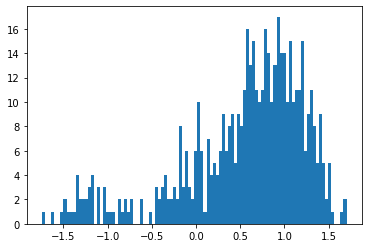

In [174]:
import matplotlib.pyplot as plt
a = plt.hist(weights[1000].flatten(), bins=100)

In [175]:
_reward

-9.364982983759791

In [176]:
callbacks[0].history

{'loss': [1.1565313479259206e+20], 'mean_squared_error': [1.1565313e+20]}

In [179]:
### run for 1 more episde with target network. No training
nbEpisodes = 1
actions = []
for i in range(nbEpisodes):
    
    # reset environment
    env.reset()
    dead = False
    
    _currentState = env.currentState
    
    while not dead:
        
        # get epsilon greeedy action
        count += 1
        if any(x is None for x in _currentState) is False:
            actionIndex = getaction(_currentState, env, count)
            actions.append(actionIndex)

            action = env.action_space.actions[actionIndex]

            # take a step in this direction
            _nextState, _reward, dead = env.step(action)
            #immediate_reward.append(_reward)

            # update memory
            # memory = updatememory(memory, _currentState, actionIndex, _reward, _nextState, dead)


        _currentState = _nextState

    
    

2021-02-01 17:15:45 INFO     Environments    Environment reset


In [180]:
env.portfolioHistory

,Date,Asset_APA,Asset_BMY,Cash,Cost,AUM
0,2003-12-31,14946.0,32503.0,19921.51,98.00,9.999020e+05
1,2004-01-02,14031.0,34493.0,19915.51,6.00,1.009564e+06
2,2004-01-05,13099.0,36451.0,19909.45,6.06,1.013972e+06
3,2004-01-06,12176.0,38423.0,19903.37,6.08,1.018557e+06
4,2004-01-07,11253.0,40395.0,19897.26,6.11,1.020893e+06
...,...,...,...,...,...,...
4272,2020-12-18,-19553006.0,7077165.0,-205491.77,806.65,1.467576e+08
4273,2020-12-21,-19840203.0,7146917.0,-206372.32,880.55,1.483469e+08
4274,2020-12-22,-20139894.0,7218686.0,-207262.40,890.08,1.588613e+08
4275,2020-12-23,-20477418.0,7296268.0,-208215.57,953.17,1.422079e+08


In [181]:
a = pd.DataFrame(actions, columns = ["Index"])

In [182]:
a.Index.value_counts()

2    3941
4      63
7      53
5      50
6      46
3      44
0      43
1      36
Name: Index, dtype: int64

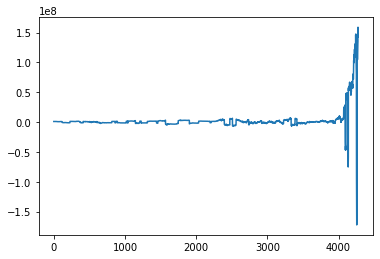

In [183]:
import matplotlib.pyplot as plt
plt.plot(env.portfolioHistory["AUM"])

In [148]:
[immediate_reward.index(item) for item in immediate_reward if item > 0.05 ]

[1306, 1313, 3781, 3791, 3871]

In [97]:
QNetwork.predict(env.currentState)

ValueError: Error when checking input: expected dense_27_input to have shape (72,) but got array with shape (1,)

In [88]:
len(env.currentState)

72